In [6]:
%matplotlib inline 
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data  # we only take the first two features.
y = iris.target
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')

overall_mean = np.mean(X, axis=0)
print('overall mean is:\n ', overall_mean)

class_mean = []
for i in range(3):
    left = i*50
    right  = (i+1)*50
    class_mean.append(np.mean(X[left:right,:], axis=0))
print('class mean is:\n ', np.asarray(class_mean))

S_b = np.zeros((4,4))
for i in range(3):
    class_i = class_mean[i].reshape(4,1)
    u = overall_mean.reshape(4,1)
    S_bi = (class_i - u).dot((class_i - u).T) 
    S_b += 1/3*S_bi
print('S_b is:\n ', S_b)

S_w = np.zeros((4,4))
# for i in range(3):
for classi in range(3):
    class_i = class_mean[classi].reshape(4,1)
    for i in range(50):
        xi = classi*50 + i
        x = X[xi].reshape(4,1)
        S_wi = (x - class_i).dot((x - class_i).T)
        S_w += S_wi
print('S_w is:\n ', S_w)



overall mean is:
  [ 5.84333333  3.054       3.75866667  1.19866667]
class mean is:
  [[ 5.006  3.418  1.464  0.244]
 [ 5.936  2.77   4.26   1.326]
 [ 6.588  2.974  5.552  2.026]]
S_b is:
  [[ 0.42141422 -0.13022667  1.10109778  0.47575378]
 [-0.13022667  0.073184   -0.37370133 -0.14994933]
 [ 1.10109778 -0.37370133  2.91095822  1.24605422]
 [ 0.47575378 -0.14994933  1.24605422  0.53736089]]
S_w is:
  [[ 38.9562  13.683   24.614    5.6556]
 [ 13.683   17.035    8.12     4.9132]
 [ 24.614    8.12    27.22     6.2536]
 [  5.6556   4.9132   6.2536   6.1756]]


In [137]:
from scipy.linalg import eigh
eig_vals, eig_vecs = eigh(S_b, S_w)
for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i]))


Eigenvector 1: 
[[ 0.23365309]
 [-0.21910935]
 [-0.24143842]
 [ 0.29184989]]
Eigenvalue 1: -4.03e-17

Eigenvector 2: 
[[-0.12160131]
 [-0.04137085]
 [-0.0617256 ]
 [ 0.23924741]]
Eigenvalue 2: 2.99e-17

Eigenvector 3: 
[[ 0.00271023]
 [ 0.17771757]
 [-0.07672546]
 [ 0.23143536]]
Eigenvalue 3: 1.85e-03

Eigenvector 4: 
[[ 0.06757213]
 [ 0.12766643]
 [-0.18021086]
 [-0.23538158]]
Eigenvalue 4: 2.15e-01


In [138]:
print('verify:')
for i in range(4):  
    verify = (S_b - eig_vals[i]*S_w).dot(eig_vecs[:,i].reshape(4,1))
    print(verify)
    print('is O')


verify:
[[  1.66533454e-16]
 [ -4.16333634e-17]
 [ -1.11022302e-16]
 [  2.77555756e-17]]
is O
[[  1.31838984e-16]
 [  1.45716772e-16]
 [ -6.93889390e-17]
 [ -5.55111512e-17]]
is O
[[ -1.59594560e-16]
 [  1.73472348e-17]
 [ -3.05311332e-16]
 [ -6.93889390e-17]]
is O
[[ -2.22044605e-16]
 [ -4.44089210e-16]
 [ -1.11022302e-16]
 [  5.55111512e-17]]
is O


In [139]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_vals):
    print('eigenvalue {0:}: {1:.3%}'.format(i+1, (eig_vals[i]/eigv_sum).real))

Variance explained:

eigenvalue 1: -0.000%
eigenvalue 2: 0.000%
eigenvalue 3: 0.853%
eigenvalue 4: 99.147%


In [142]:
W = np.hstack((eig_vecs[:,3].reshape(4,1), eig_vecs[:,2].reshape(4,1)))
print('Matrix W:\n', W)

Matrix W:
 [[ 0.06757213  0.00271023]
 [ 0.12766643  0.17771757]
 [-0.18021086 -0.07672546]
 [-0.23538158  0.23143536]]


In [196]:
def plot(W):
    print('wt is:\n',W)
    X_lda = X.dot(W)
    axes = np.shape(W)[1]
    if axes == 1:
        plt.hist(x = X_lda[0:50], bins = 10, color = 'r', alpha = 0.3)
        plt.hist(x = X_lda[51:100], bins = 10, color = 'g', alpha = 0.3) 
        plt.hist(x = X_lda[101:150], bins = 10, color = 'b', alpha = 0.3)
    else:
        fig, ax = plt.subplots(figsize=(20,5),nrows=1, ncols = axes)
        for feature_i in range(axes):
            ax[feature_i].hist(x = X_lda[0:50, feature_i], bins = 10, color = 'r', alpha = 0.3)
            ax[feature_i].hist(x = X_lda[51:100, feature_i], bins = 10, color = 'g', alpha = 0.3) 
            ax[feature_i].hist(x = X_lda[101:150, feature_i], bins = 10, color = 'b', alpha = 0.3)

wt is:
 [[ 0.06757213]
 [ 0.12766643]
 [-0.18021086]
 [-0.23538158]]


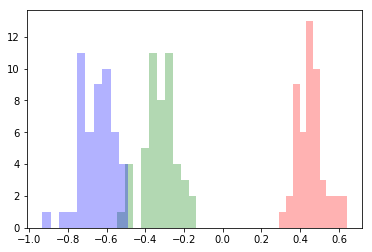

In [197]:
#one dimention
W = eig_vecs[:,3].reshape(4,1)
plot(W)

wt is:
 [[ 0.16757213]
 [ 0.22766643]
 [-0.08021086]
 [-0.13538158]]


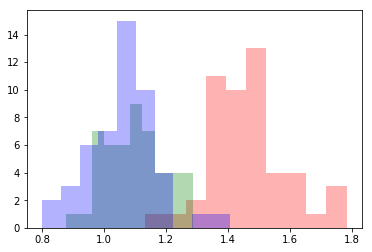

In [198]:
W = eig_vecs[:,3].reshape(4,1) + np.ones((4,1))*0.1
plot(W)

wt is:
 [[ 0.06757213  0.00271023]
 [ 0.12766643  0.17771757]
 [-0.18021086 -0.07672546]
 [-0.23538158  0.23143536]]


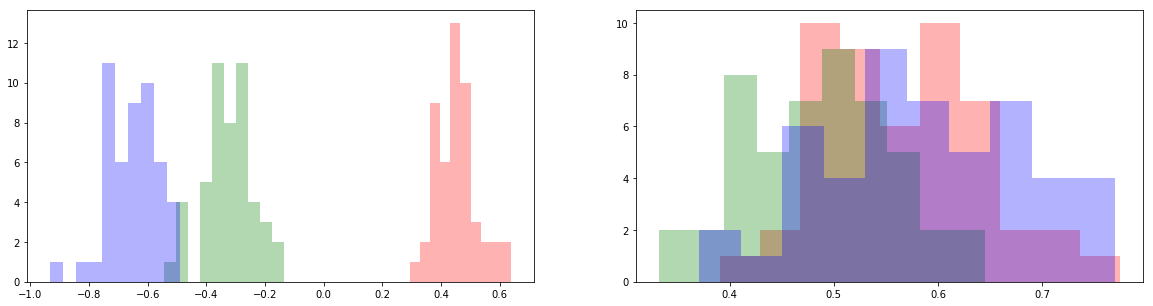

In [199]:
W = np.hstack((eig_vecs[:,3].reshape(4,1), eig_vecs[:,2].reshape(4,1)))
plot(W)

wt is:
 [[ 0.06757213  0.00271023  0.00271023]
 [ 0.12766643  0.17771757  0.17771757]
 [-0.18021086 -0.07672546 -0.07672546]
 [-0.23538158  0.23143536  0.23143536]]


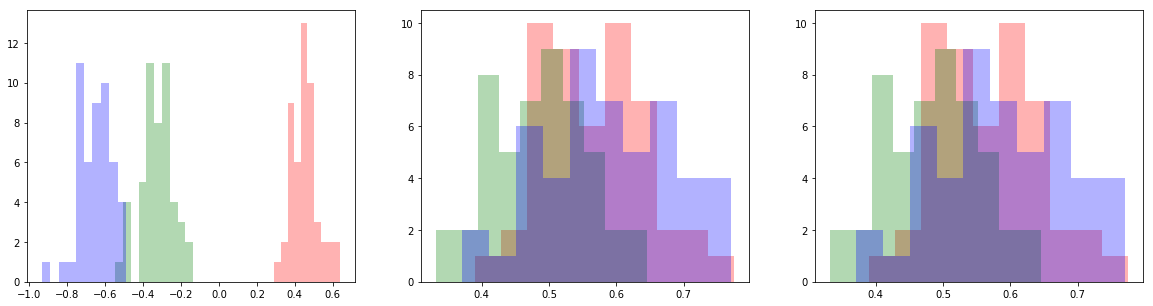

In [200]:
W = np.hstack((eig_vecs[:,3].reshape(4,1), eig_vecs[:,2].reshape(4,1), eig_vecs[:,2].reshape(4,1)))
plot(W)